In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
wine_0 = pd.read_csv('winemag-data_first150k.csv', index_col = 0)
wine_1 = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0)
wine_df = pd.concat([wine_0, wine_1], axis = 0)
print(wine_df.shape)
wine_df.head()

(280901, 13)


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


In [3]:
wine_df.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
wine_df.isnull().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
dtype: int64

In [11]:
wine_df.drop(['designation', 'region_1', 'region_2','taster_name','taster_twitter_handle'], axis=1, inplace=True)
wine_df.head()

,country,description,points,price,province,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,NaN,Provence red blend,Domaine de la Bégude


In [12]:
wine_df.drop_duplicates(subset=['title'], keep=False, inplace=True)
wine_df.shape

(108104, 8)

In [13]:
wine_df.dropna(subset=['country'], inplace=True)
wine_df.dropna(subset=['province'], inplace=True)
wine_df.dropna(subset=['price'], inplace=True)

In [15]:
varieties = wine_df['variety'].value_counts()
wine_df = wine_df.loc[wine_df['variety'].isin(varieties.axes[0][:20])]
wine_df['variety'].value_counts()

Pinot Noir                  10750
Chardonnay                   9250
Cabernet Sauvignon           8109
Red Blend                    7094
Bordeaux-style Red Blend     4465
Riesling                     4145
Sauvignon Blanc              3968
Syrah                        3461
Merlot                       2634
Rosé                         2630
Zinfandel                    2329
Malbec                       2189
Nebbiolo                     1975
Sangiovese                   1945
Portuguese Red               1838
White Blend                  1815
Tempranillo                  1506
Sparkling Blend              1296
Rhône-style Red Blend        1157
Pinot Gris                   1135
Name: variety, dtype: int64

In [16]:
wine_df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

In [21]:
wine_df.shape

(73691, 8)

Text(0.5, 1.0, 'Distribution of Top 20 Countries')

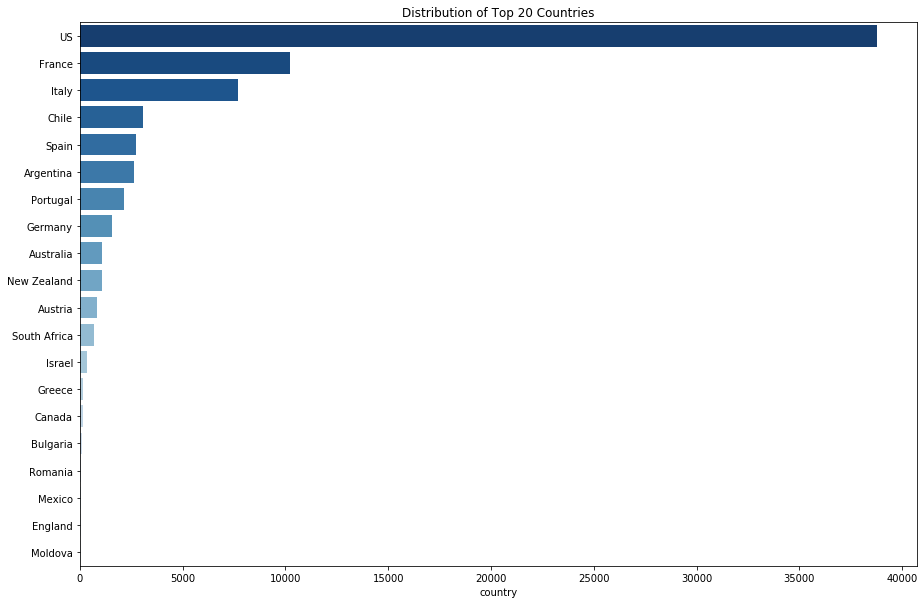

In [17]:
plt.figure(figsize=(15,10))
top20_countries = wine_df.country.value_counts().to_frame()[0:20]
sns.barplot(x = top20_countries.country, y = top20_countries.index, data=top20_countries, palette='Blues_r')
plt.title('Distribution of Top 20 Countries')

Text(0.5, 0, 'Price')

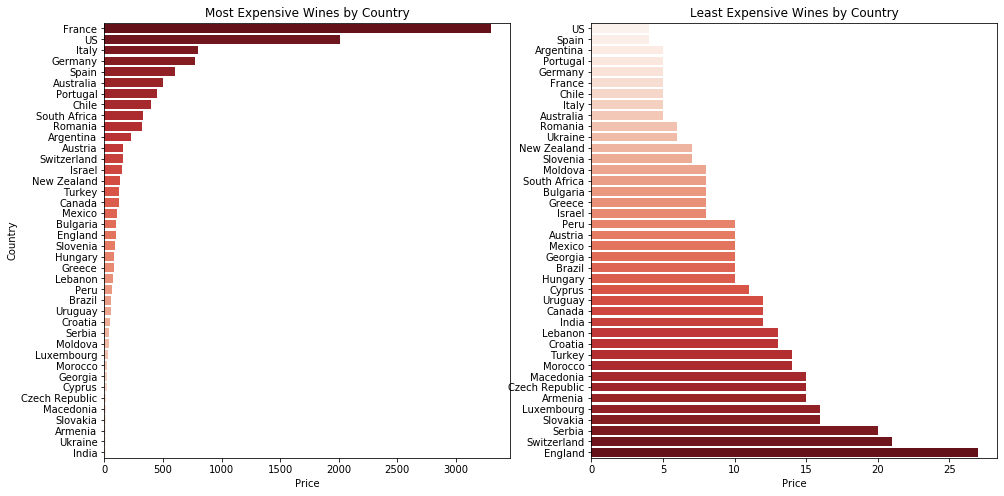

In [18]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
ax1, ax2 = ax.flatten()

temp0 = wine_df.groupby(['country'])['price'].max().sort_values(ascending=False)
sns.barplot(x = temp0, y = temp0.index, palette = 'Reds_r', ax = ax1)
ax1.set_title('Most Expensive Wines by Country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Price')
temp1 = wine_df.groupby(['country'])['price'].min().sort_values(ascending=True)
sns.barplot(x = temp1, y = temp1.index, palette = 'Reds', ax = ax2)
ax2.set_title('Least Expensive Wines by Country')
ax2.set_ylabel('')
ax2.set_xlabel('Price')

While countries like France, the United States, and Portugal produce some of the most expensive wines in the dataset, they also produce some of least expensive as well, representing the range of consumer demand in these countries.

In [19]:
def calculate_outliers(df): 
    mean = np.mean(df) 
    std = np.std(df)

    cut = std * 3

    lower_cut = mean - cut
    upper_cut = mean + cut
 
    outliers_lower = [x for x in df if x < lower_cut]
    outliers_higher = [x for x in df if x > upper_cut]
    outliers_total = [x for x in df if x < lower_cut or x > upper_cut]

    outliers_removed = [x for x in df if x > lower_cut and x < upper_cut]
    
    print('# lower outliers: %d' % len(outliers_lower))
    print('# higher outliers: %d' % len(outliers_higher))
    print('# total outliers: %d' % len(outliers_total))
    print('# non-outlier observations: %d' % len(outliers_removed))
    print('% of outlier observations: ', round((len(outliers_total) / len(outliers_removed) )*100, 4))
    
    return

Text(0.5, 0, 'log(Price)')

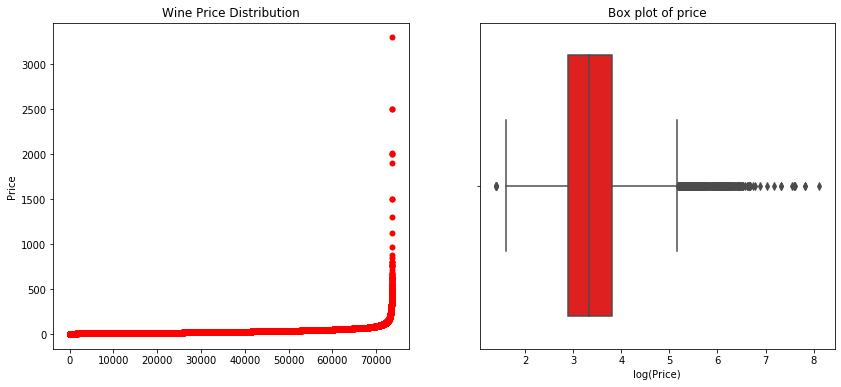

In [20]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax0, ax1 = ax.flatten()
sns.scatterplot(x=range(wine_df.shape[0]), y=np.sort(wine_df.price.values), color='r', linewidth=0, ax=ax0)
ax0.set_ylabel('Price')
ax0.set_title('Wine Price Distribution')
sns.boxplot(x=np.log(wine_df.price), color='r', ax=ax1)
ax1.set_title('Box plot of price')
ax1.set_xlabel('log(Price)')

In [22]:
calculate_outliers(wine_df.price)

# lower outliers: 0
# higher outliers: 751
# total outliers: 751
# non-outlier observations: 72940
% of outlier observations:  1.0296


There are 0 lower outliers and 751 higher outliers in the price data, representing 1.0296% of total observations.

Text(0, 0.5, 'Country')

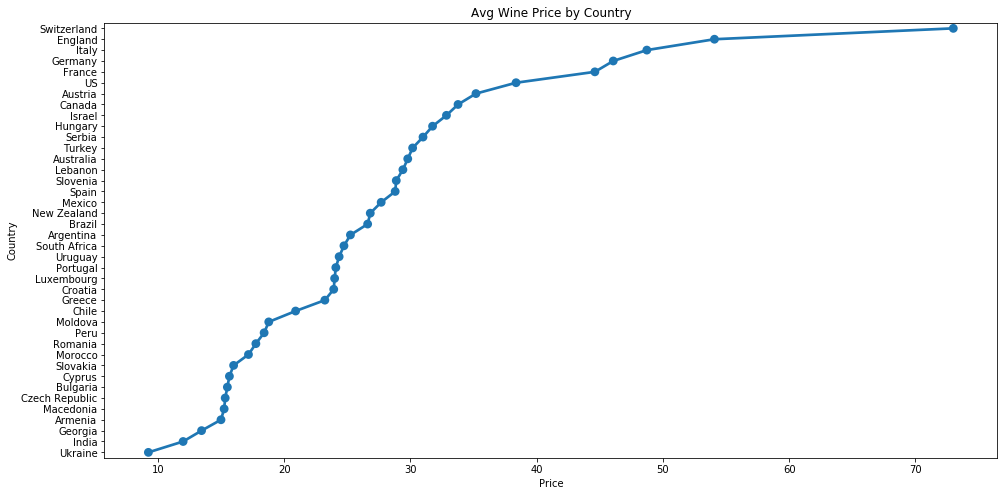

In [23]:
temp = wine_df.groupby(['country']).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16, 8))
sns.pointplot(x = temp.price, y = temp.index, orient='h', markers='o')
plt.title('Avg Wine Price by Country')
plt.xlabel('Price')
plt.ylabel('Country')

Text(0.5, 1.0, 'Box plot of points')

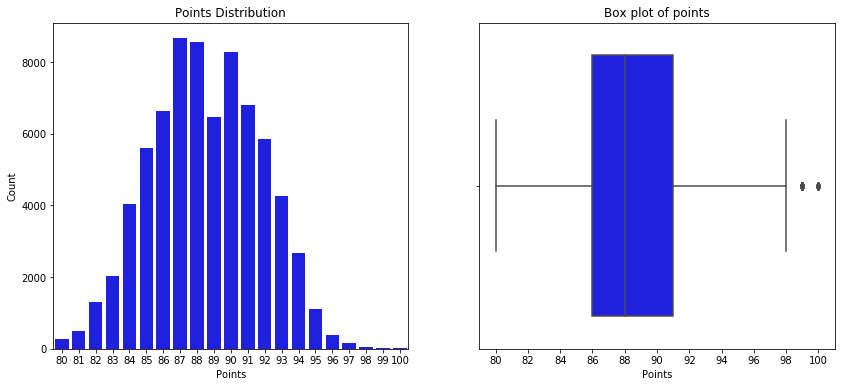

In [24]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax0, ax1 = ax.flatten()
sns.countplot(x='points', data=wine_df, color='blue', ax=ax0)
ax0.set_xlabel('Points')
ax0.set_ylabel('Count')
ax0.set_title('Points Distribution')
sns.boxplot(x=wine_df.points, color='blue', ax=ax1)
ax1.set_xlabel('Points')
ax1.set_xticks(np.arange(80,101,2))
ax1.set_title('Box plot of points')

In [25]:
calculate_outliers(wine_df.points)

# lower outliers: 0
# higher outliers: 35
# total outliers: 35
# non-outlier observations: 73656
% of outlier observations:  0.0475


There are 0 lower outliers and 35 higher outliers in the points data, representing 0.0475% of total observations.

Text(0.5, 0, 'Points')

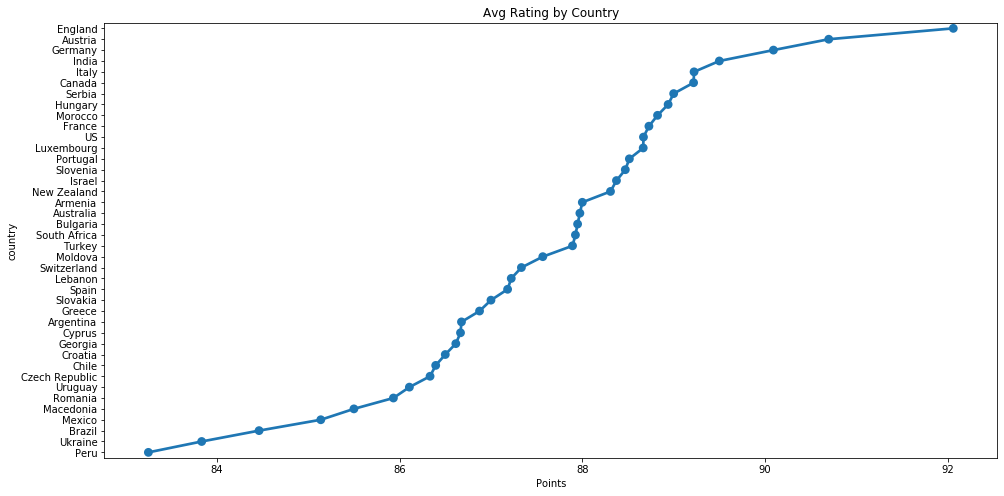

In [26]:
temp = wine_df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = temp.points, y = temp.index)
plt.title('Avg Rating by Country')
plt.xlabel('Points')

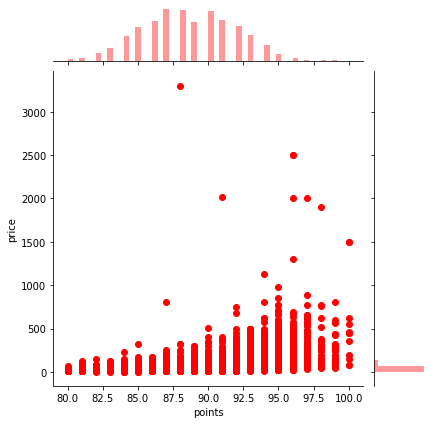

In [27]:
sns.jointplot(x=wine_df.points, y=wine_df.price, color='r')

In [28]:
wine_df[wine_df['price']>=3000]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Relationship between points and price is generally positively correlated, with few exceptions. Surprisingly, the most expensive wine in the dataset at $3,300, is given a rating of only 88 points, which is around the mean for the points column.

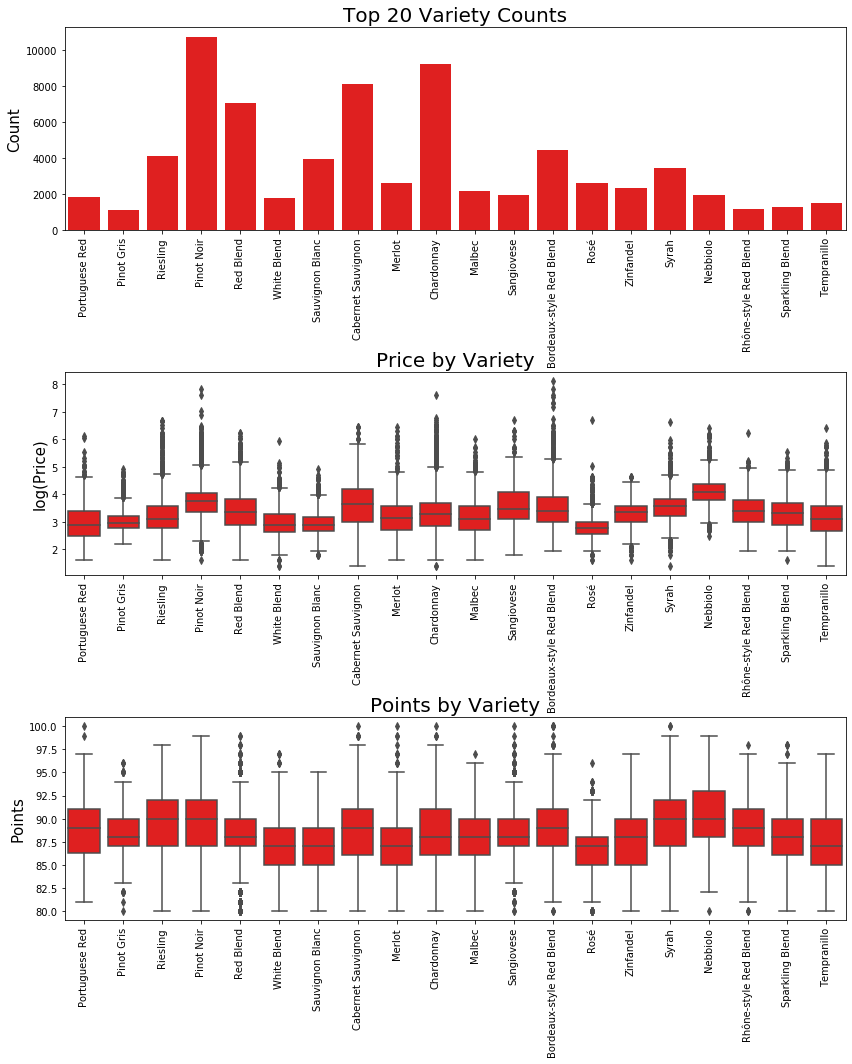

In [33]:
plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
p0 = sns.countplot(x='variety', data=wine_df, color='red')
p0.set_title('Top 20 Variety Counts', fontsize=20)
p0.set_xlabel('', fontsize=15)
p0.set_ylabel('Count', fontsize=15)
p0.set_xticklabels(p0.get_xticklabels(),rotation=90)

plt.subplot(3,1,2)
p1 = sns.boxplot(y=np.log(wine_df.price), x='variety', data=wine_df, color='red')
p1.set_title('Price by Variety', fontsize=20)
p1.set_xlabel('', fontsize=15)
p1.set_ylabel('log(Price)', fontsize=15)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

plt.subplot(3,1,3)
p2 = sns.boxplot(y='points', x='variety', data=wine_df, color='red')
p2.set_title('Points by Variety', fontsize=20)
p2.set_xlabel('', fontsize=15)
p2.set_ylabel('Points', fontsize=15)
p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

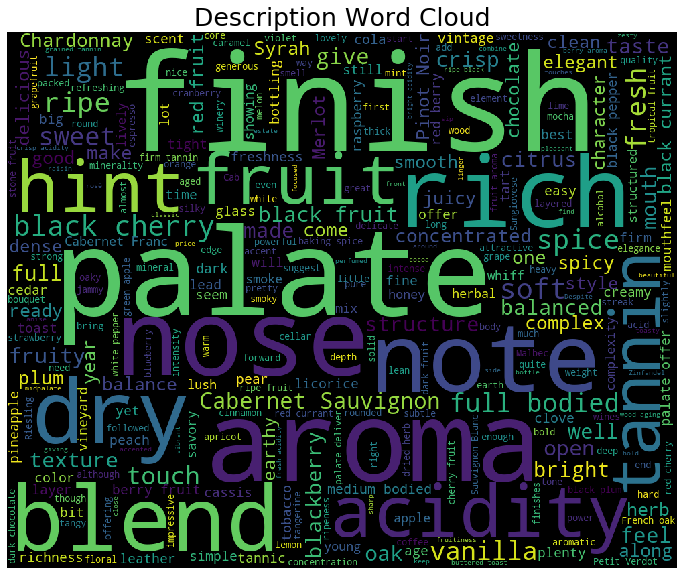

In [34]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stop_list = ['wine', 'Drink', 'drink', 'now', 'flavor', 'flavors', 'show', 'shows']
stopwords.update(stop_list)

wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=300, max_font_size=200, 
                      width=1000, height=800, random_state=42).generate(' '.join(wine_df.description.astype(str)))

fig = plt.figure(figsize = (12, 14))
plt.imshow(wordcloud)
plt.title('Description Word Cloud', fontsize=25)
plt.axis('off')
plt.show()

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

sentiment_df = wine_df.sample(20000).copy()
sentiment_df['polarity_score'] = sentiment_df.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment_df['neutral_score'] = sentiment_df.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment_df['negative_score'] = sentiment_df.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment_df['positive_score'] = sentiment_df.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment_df['sentiment']= np.nan
sentiment_df.loc[sentiment_df.polarity_score > 0, 'sentiment'] = 'Positive'
sentiment_df.loc[sentiment_df.polarity_score == 0, 'sentiment'] = 'Neutral'
sentiment_df.loc[sentiment_df.polarity_score < 0, 'sentiment'] = 'Negative'

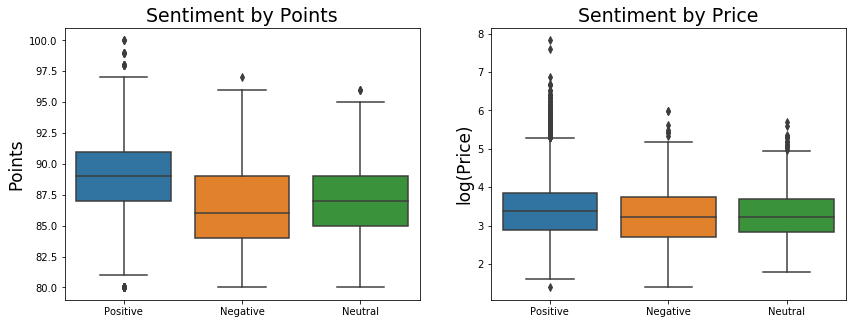

In [36]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
p0 = sns.boxplot(x='sentiment', y='points', data=sentiment_df)
p0.set_title('Sentiment by Points', fontsize=19)
p0.set_ylabel('Points', fontsize=17)
p0.set_xlabel('', fontsize=17)

plt.subplot(122)
p1 = sns.boxplot(x='sentiment', y=np.log(sentiment_df.price), data=sentiment_df)
p1.set_title('Sentiment by Price', fontsize=19)
p1.set_ylabel('log(Price)', fontsize=17)
p1.set_xlabel('', fontsize=17)

plt.show()

In [37]:
temp = wine_df.groupby('variety').mean()
print(temp.sort_values('points', ascending=False)[:5])
print(temp.sort_values('price', ascending=False)[:5])

                          points      price
variety                                    
Nebbiolo               90.492658  67.134684
Riesling               89.507358  33.353197
Pinot Noir             89.457581  48.395070
Syrah                  89.328807  38.959838
Rhône-style Red Blend  89.133103  35.443388
                             points      price
variety                                       
Nebbiolo                  90.492658  67.134684
Cabernet Sauvignon        88.637687  48.701689
Bordeaux-style Red Blend  88.818365  48.585442
Pinot Noir                89.457581  48.395070
Sangiovese                88.602571  45.617995


In [54]:
def points_category(points):
    if(points <= 85):
        return 'bad'
    elif(points <= 90):
        return 'ok'
    elif(points <= 95):
        return 'good'
    elif(points <= 100):
        return 'great'

In [59]:
wine_df['quality'] = wine_df['points'].apply(points_category)
wine_df.head()

,country,description,points,price,province,title,variety,winery,quality
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ok
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,ok
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,ok
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,ok
15,Germany,Zesty orange peels and apple notes abound in t...,87,24.0,Mosel,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking,ok


In [61]:
def price_range(price):
    if(price <= 30):
        return '1-30'
    elif(price <= 60):
        return '31-60'
    elif(price <= 100): 
        return '61-100'
    else:
        return '100+'

In [62]:
wine_df['price_range'] = wine_df['price'].apply(price_range)
wine_df.head()

,country,description,points,price,province,title,variety,winery,quality,price_range
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ok,1-30
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,ok,1-30
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,ok,1-30
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,ok,61-100
15,Germany,Zesty orange peels and apple notes abound in t...,87,24.0,Mosel,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking,ok,1-30


In [69]:
t = wine_df.groupby(['quality', 'price_range']).size().unstack(level=-1)
t

price_range,1-30,100+,31-60,61-100
quality,,,,
bad,12037,26,1505,184
good,4019,1721,10356,4584
great,7,324,100,219
ok,25327,385,10941,1956


In [76]:
from scipy.stats import chi2, chi2_contingency

stat, p, dof, expected = chi2_contingency(t)
print('dof=%d' % dof, '\n')
print(expected, '\n')

prob = 0.95
crit = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, crit, stat), '\n')
if abs(stat) >= crit:
    print('Dependent (reject H0)', '\n')
else:
    print('Independent (fail to reject H0)', '\n')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p), '\n')
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=9 

[[7.72408137e+03 4.58331574e+02 4.27390460e+03 1.29568246e+03]
 [1.16153289e+04 6.89230435e+02 6.42701768e+03 1.94842301e+03]
 [3.65085289e+02 2.16634324e+01 2.02009743e+02 6.12415356e+01]
 [2.16855045e+04 1.28677456e+03 1.19990680e+04 3.63765300e+03]] 

probability=0.950, critical=16.919, stat=25185.857 

Dependent (reject H0) 

significance=0.050, p=0.000 

Dependent (reject H0)


In [77]:
wine_df.to_csv('clean_wine_df.csv')